In [ ]:
# Notebook for scraping Boston Marathon 2024 results (Women)
# Author: Amanda Hattaway
# Date: 2025-01-02

# This script grabs the raw data for the Boston Marathon 2024 results (Women).
# The next cell will clean up the data.
# Note: This scraping process took a significant amount of time to run (~28 minutes)
# so you may prefer to use the pre-scraped results file "Boston_marathon_women_2024.csv" from this script.
# For convenience, the cleaned version can be found as the result of the next cell.
# In the future, consider using screenshot and OCR methods to see if the process can be sped up.


from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
import pandas as pd
import time

driver = webdriver.Chrome()  

# URL of the results page (ACCESSED jAN 2, 2025)
base_url = "https://results.baa.org/2024/?page={page}&event=R&event_main_group=runner&num_results=1000&pid=list&search%5Bsex%5D=W&search%5Bage_class%5D=%25"


all_results = []


total_results = 10924  #I inspected and just put this in on Jan 2, 2025
results_per_page = 1000  


total_pages = (total_results // results_per_page) + (1 if total_results % results_per_page > 0 else 0)

try:
  
    for page in range(1, total_pages + 1):
       
        url = base_url.format(page=page)
        driver.get(url)

        print(f"Scraping page {page} of {total_pages}...")

        
        list_items = WebDriverWait(driver, 20).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "ul.list-group li.list-group-item"))
        )
        print(f"Found {len(list_items)} result items on page {page}")

       
        for item in list_items:
           
            try:
                overall_place = item.find_element(By.CSS_SELECTOR, ".list-field.type-place.place-secondary").text.strip()
            except:
                overall_place = "N/A"

            try:
                gender_place = item.find_element(By.CSS_SELECTOR, ".list-field.type-place.place-primary").text.strip()
            except:
                gender_place = "N/A"

            try:
                division_place = item.find_element(By.CSS_SELECTOR, ".list-field.type-place.place-secondary").text.strip()
            except:
                division_place = "N/A"

            try:
                name = item.find_element(By.CSS_SELECTOR, ".list-field.type-fullname").text.strip()
            except:
                name = "N/A"

            try:
                bib = item.find_element(By.CSS_SELECTOR, ".list-field.type-field").text.strip()
            except:
                bib = "N/A"

            try:
                team = item.find_element(By.CSS_SELECTOR, ".list-field.type-field").text.strip() if len(item.find_elements(By.CSS_SELECTOR, ".list-field.type-field")) > 1 else "N/A"
            except:
                team = "N/A"

            try:
                half = item.find_elements(By.CSS_SELECTOR, ".split.list-field.type-time")[0].text.strip()
            except:
                half = "N/A"

            try:
                finish_net = item.find_elements(By.CSS_SELECTOR, ".split.list-field.type-time")[1].text.strip()
            except:
                finish_net = "N/A"

            try:
                finish_gun = item.find_elements(By.CSS_SELECTOR, ".split.list-field.type-time")[2].text.strip()
            except:
                finish_gun = "N/A"

           
            all_results.append([
                overall_place, gender_place, division_place, name, bib, team, half, finish_net, finish_gun
            ])

       
        time.sleep(2)  

   
    print(f"Scraped {len(all_results)} rows in total.")

except Exception as e:
    print(f"Error: {e}")

finally:
  
    driver.quit()


if all_results:
    
    df = pd.DataFrame(all_results)

  
    df.columns = [
        "Overall Place",
        "Gender Place",
        "Division Place",
        "Name",
        "BIB",
        "Team",
        "Half",
        "Finish Net",
        "Finish Gun",
    ]

   
    file_path = r"Boston_marathon_women_2024.csv"
    df.to_csv(file_path, index=False)
    print(f"Scraping complete! Results saved to {file_path}")
else:
    print("No results found, exiting.")


Scraping page 1 of 11...
Found 1002 result items on page 1
Scraping page 2 of 11...
Found 1002 result items on page 2
Scraping page 3 of 11...
Found 1002 result items on page 3
Scraping page 4 of 11...
Found 1002 result items on page 4
Scraping page 5 of 11...
Found 1002 result items on page 5
Scraping page 6 of 11...
Found 1002 result items on page 6
Scraping page 7 of 11...
Found 1002 result items on page 7
Scraping page 8 of 11...
Found 1002 result items on page 8
Scraping page 9 of 11...
Found 1002 result items on page 9
Scraping page 10 of 11...
Found 1002 result items on page 10
Scraping page 11 of 11...
Found 926 result items on page 11
Scraped 10946 rows in total.
Scraping complete! Results saved to Boston_marathon_women_2024.csv


# Clean the scrape now:


In [15]:
import pandas as pd
import re


input_file = "Boston_marathon_women_2024.csv"
output_file = "Boston_marathon_women_2024_cleaned.csv"


df = pd.read_csv(input_file)


def clean_text(text):
    if isinstance(text, str):
     
        text = text.replace('â€“', '-').strip()
      
        text = re.sub(r'\s+', ' ', text)
        
      
        text = text.replace('HALF', '').replace('Finish Net', '').replace('Finish Gun', '').strip()
        return text
    return text


df = df.applymap(clean_text)


df = df[~df['Overall Place'].str.contains("N/A|Place Overall", na=False)]


df = df[["Overall Place", "Gender Place", "Division Place", "Name", "Half", "Finish Net", "Finish Gun"]]


df.columns = ["Overall Place", "Gender Place", "Division Place", "Name", "Half", "Finish Net", "Finish Gun"]


df.dropna(how="all", inplace=True)


df.to_csv(output_file, index=False)

print(f"Cleaned results saved to {output_file}")


Cleaned results saved to Boston_marathon_women_2024_cleaned.csv


In [16]:
df.head()

,Overall Place,Gender Place,Division Place,Name,Half,Finish Net,Finish Gun
2,37,1,37,"Obiri, Hellen",01:12:33,02:22:37,02:22:37
3,39,2,39,"Lokedi, Sharon",01:12:34,02:22:45,02:22:45
4,40,3,40,"Kiplagat, Edna",01:12:35,02:23:21,02:23:21
5,42,4,42,"Diriba, Buze",01:12:34,02:24:04,02:24:04
6,44,5,44,"Teferi, Senbere",01:12:34,02:24:04,02:24:04


 # Comparison of Bagging and Boosting: Random Forest (Bagging) vs. Gradient Boosting

Random Forest (Bagging) Model:
Mean Absolute Error: 9.95
Mean Squared Error: 194.77

Gradient Boosting (Boosting) Model:
Mean Absolute Error: 8.60
Mean Squared Error: 145.47


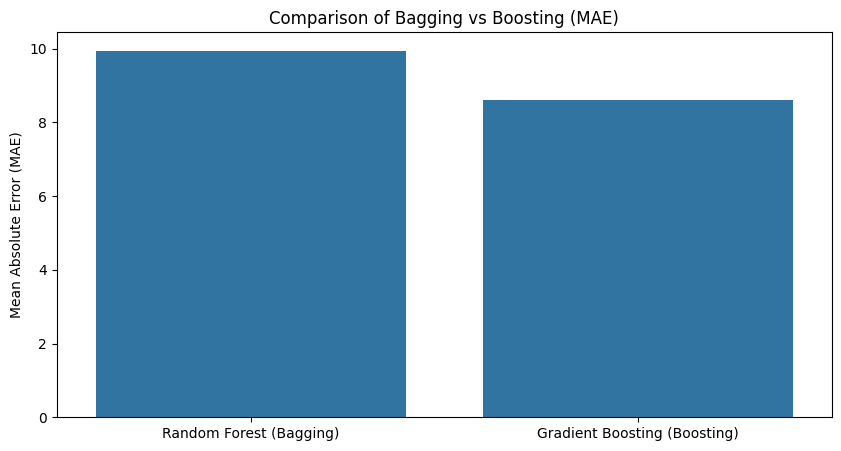

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('Boston_marathon_women_2024_cleaned.csv')


data['Half'] = data['Half'].str.replace(r'[^0-9:]', '', regex=True)
data['Finish Net'] = data['Finish Net'].str.replace(r'[^0-9:]', '', regex=True)


data['Half'] = pd.to_timedelta(data['Half'], errors='coerce').dt.total_seconds() / 60  # Convert to minutes
data['Finish Net'] = pd.to_timedelta(data['Finish Net'], errors='coerce').dt.total_seconds() / 60


data = data.dropna(subset=['Half', 'Finish Net'])


X = data[['Half']]  
y = data['Finish Net']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


gb_model = HistGradientBoostingRegressor(max_iter=100, random_state=42) 
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


print("Random Forest (Bagging) Model:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")

print("\nGradient Boosting (Boosting) Model:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_gb):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_gb):.2f}")


fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=['Random Forest (Bagging)', 'Gradient Boosting (Boosting)'], 
            y=[mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_gb)], ax=ax)
ax.set_title('Comparison of Bagging vs Boosting (MAE)')
ax.set_ylabel('Mean Absolute Error (MAE)')
plt.show()


These results suggest that Gradient Boosting performs slightly better than Random Forest in terms of both MAE and MSE, indicating that it makes smaller errors overall. Let's evaluate them using the R-squared metric, which gives us an idea of how well each model explains the variance in the target variable (Finish Net).

In [3]:
from sklearn.metrics import r2_score

print("Random Forest (Bagging) R-squared: ", r2_score(y_test, y_pred_rf))
print("Gradient Boosting (Boosting) R-squared: ", r2_score(y_test, y_pred_gb))


Random Forest (Bagging) R-squared:  0.9012614020702872
Gradient Boosting (Boosting) R-squared:  0.9262564065352714


## Hyperparameter Tuning 
Both models perform well, with Gradient Boosting slightly outperforming Random Forest. However, we can further improve model performance by fine-tuning the hyperparameters of each model. This will help us identify the best set of parameters for each model, potentially leading to even better predictive performance.

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Randomized hyperparameter tuning for Bagging (Random Forest)
rf_param_dist = {
    'n_estimators': np.arange(50, 150, 50),  # Fewer estimators to test
    'max_depth': [10, 20, None],  # Limited depths
    'min_samples_split': [2, 5],  # Fewer values for testing
}

rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_param_dist, n_iter=5, cv=3, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

print("Best Random Forest Hyperparameters: ", rf_random_search.best_params_)
rf_best_model = rf_random_search.best_estimator_

# Randomized hyperparameter tuning for Boosting (Gradient Boosting)
gb_param_dist = {
    'n_estimators': np.arange(50, 150, 50),
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

gb_random_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), gb_param_dist, n_iter=5, cv=3, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)
gb_random_search.fit(X_train, y_train)

print("Best Gradient Boosting Hyperparameters: ", gb_random_search.best_params_)
gb_best_model = gb_random_search.best_estimator_

# Predictions with the best tuned models
y_pred_rf_tuned = rf_best_model.predict(X_test)
y_pred_gb_tuned = gb_best_model.predict(X_test)

# Evaluation metrics
print("\nTuned Random Forest (Bagging) Model:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf_tuned):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf_tuned):.2f}")

print("\nTuned Gradient Boosting (Boosting) Model:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_gb_tuned):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_gb_tuned):.2f}")


Best Random Forest Hyperparameters:  {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}
Best Gradient Boosting Hyperparameters:  {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

Tuned Random Forest (Bagging) Model:
Mean Absolute Error: 8.87
Mean Squared Error: 156.28

Tuned Gradient Boosting (Boosting) Model:
Mean Absolute Error: 8.48
Mean Squared Error: 143.18


The Random Forest (Bagging) model's hyperparameters were tuned for the best performance, resulting in a slight improvement in MAE and MSE compared to the initial model.
The Gradient Boosting (Boosting) model, with tuned hyperparameters, showed a better performance (lower MAE and MSE) compared to the Random Forest, indicating it was able to better capture the underlying patterns in the data.

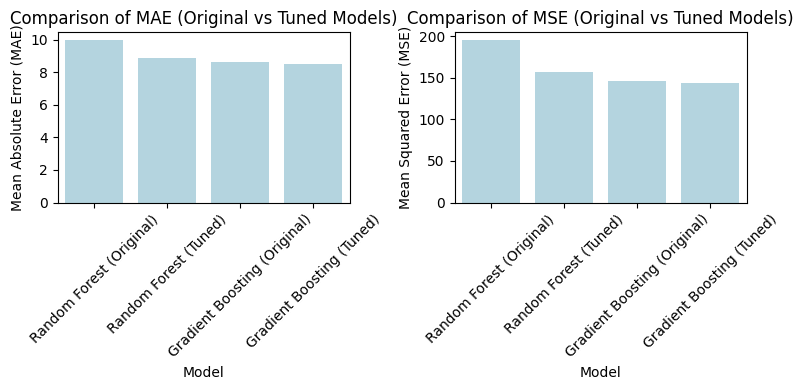

                          Model   MAE     MSE
0      Random Forest (Original)  9.95  194.77
1         Random Forest (Tuned)  8.87  156.28
2  Gradient Boosting (Original)  8.60  145.47
3     Gradient Boosting (Tuned)  8.48  143.18


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(8, 4))


sns.barplot(x='Model', y='MAE', data=comparison_df, ax=ax[0], color='lightblue')
ax[0].set_title('Comparison of MAE (Original vs Tuned Models)')
ax[0].set_ylabel('Mean Absolute Error (MAE)')
ax[0].set_xticks(range(len(comparison_df)))
ax[0].set_xticklabels(comparison_df['Model'], rotation=45)


sns.barplot(x='Model', y='MSE', data=comparison_df, ax=ax[1], color='lightblue')
ax[1].set_title('Comparison of MSE (Original vs Tuned Models)')
ax[1].set_ylabel('Mean Squared Error (MSE)')
ax[1].set_xticks(range(len(comparison_df)))
ax[1].set_xticklabels(comparison_df['Model'], rotation=45)

plt.tight_layout()
plt.show()


print(comparison_df)


Hyperparameter tuning resulted in better performance for both models, but Random Forest benefited the most from the tuning.
Gradient Boosting had a more modest improvement in comparison, which might suggest it's already closer to an optimal configuration with the initial settings.

### Do these models even make sense?
#### Prediction of Finish Net Time Based on Half Time Using Trained Models (Random Forest & Gradient Boosting)

Below, we used the trained Random Forest (Bagging) and Gradient Boosting (Boosting) models to predict the marathon finish time based on the half time. For demonstration, we used 100 minutes as an example input for the "Half" time. While this provides a rough estimate, it doesn't fully capture the nuances of individual runners, as other factors such as age, gender, and experience significantly influence overall marathon times.

In future iterations, stratifying the data by age would improve the predictions. So when I get a chance I will rescape https://results.baa.org/2024/ to better the refine the model.

In [26]:

new_data = pd.DataFrame({
    'Half': [100],  # Example: 1 hour and 40 minutes for the "Half" time
})

new_prediction_rf = rf_best_model.predict(new_data)
new_prediction_gb = gb_best_model.predict(new_data)


def convert_to_hours_minutes(minutes):
    hours = int(minutes // 60)
    mins = int(minutes % 60)
    return f"{hours}h {mins}m"


print(f"Random Forest (Bagging) Prediction for new data: {convert_to_hours_minutes(new_prediction_rf[0])}")
print(f"Gradient Boosting (Boosting) Prediction for new data: {convert_to_hours_minutes(new_prediction_gb[0])}")



Random Forest (Bagging) Prediction for new data: 3h 31m
Gradient Boosting (Boosting) Prediction for new data: 3h 31m
